In [63]:
# Importing required libraries
import pandas as pd
import glob

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [4]:
# Fetching files names
train_filename = glob.glob('train*.csv')
test_filename = glob.glob('test*.csv')
print(train_filename, test_filename)

['train_MpHjUjU.csv'] ['test_hXY9mYw.csv']


In [68]:
# Loading Preprocessed file
train = pd.read_csv('./preprocess/preprocess_5.csv')


In [69]:
# Features extracted from Logistic Regression
col = ['Salary', 'Quarterly Rating', 'JoinDesignation_3', 'Designation_2',
       'Difference_Designation_1', 'Difference_Designation_2']

In [71]:
train_df = train[col + ['Emp_ID' ,'Attrition']]

In [72]:
train_df.head()

,Salary,Quarterly Rating,JoinDesignation_3,Designation_2,Difference_Designation_1,Difference_Designation_2,Emp_ID,Attrition
0,57387,2.0,0,0,0,0,1,1
1,67016,1.0,0,1,0,0,2,0
2,65603,1.0,0,1,0,0,4,1
3,46368,1.0,0,0,0,0,5,1
4,78728,1.6,1,0,0,0,6,0


In [73]:
Scaler = StandardScaler()

In [74]:
num_vars = ['Salary', 'Quarterly Rating']

In [75]:
# Scaling numerical vaariables
train_df[num_vars]= Scaler.fit_transform(train_df[num_vars])

<ipython-input-75-2302498be0ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[num_vars]= Scaler.fit_transform(train_df[num_vars])
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [76]:
# Fitting the complete train data
logsk = LogisticRegression()
logsk.fit(train_df[col], train_df['Attrition'])

LogisticRegression()

In [77]:
# Prediction
y_pred = logsk.predict_proba(train_df[col])

In [78]:

y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1
0,0.322287,0.677713
1,0.187338,0.812662
2,0.186220,0.813780
3,0.108338,0.891662
4,0.523198,0.476802


In [79]:
# Probability of Attrition
y_pred_1 = y_pred_df[[1]]
y_pred_1.head()

,1
0,0.677713
1,0.812662
2,0.813780
3,0.891662
4,0.476802


In [80]:
y_test = train_df['Attrition']

In [81]:
y_test.head()

0    1
1    0
2    1
3    1
4    0
Name: Attrition, dtype: int64

In [82]:
y_test_df = pd.DataFrame(train_df['Attrition'])

In [83]:
y_test_df.head()

,Attrition
0,1
1,0
2,1
3,1
4,0


In [91]:
y_pred_final = pd.concat([y_test_df, y_pred_1, train_df['Emp_ID']], 1)
y_pred_final.head()

,Attrition,1,Emp_ID
0,1,0.677713,1
1,0,0.812662,2
2,1,0.813780,4
3,1,0.891662,5
4,0,0.476802,6


In [99]:
y_pred_final.shape

(2381, 4)

In [92]:
y_pred_final = y_pred_final.rename(columns= {1: 'Attrition_Prob'})


In [93]:
y_pred_final['predicted'] = y_pred_final['Attrition_Prob'].apply(lambda x:1 if x>0.5 else 0)
y_pred_final.head()

,Attrition,Attrition_Prob,Emp_ID,predicted
0,1,0.677713,1,1
1,0,0.812662,2,1
2,1,0.813780,4,1
3,1,0.891662,5,1
4,0,0.476802,6,0


In [94]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_pred_final['Attrition'], y_pred_final['predicted'])
confusion

array([[ 327,  438],
       [ 139, 1477]], dtype=int64)

In [95]:
# Accuracy Score
metrics.accuracy_score(y_pred_final['Attrition'], y_pred_final['predicted'])

0.7576648467030659

In [96]:
# F1 Score
metrics.f1_score(y_pred_final['Attrition'], y_pred_final['predicted'])

0.8365902010761823

In [97]:
test = pd.read_csv('./' + test_filename[0])
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [100]:
output_df = pd.merge(y_pred_final, test, on='Emp_ID')

In [101]:
output_df.head()

,Attrition,Attrition_Prob,Emp_ID,predicted
0,0,0.812662,2,1
1,0,0.476802,6,0
2,0,0.893756,11,1
3,0,0.730811,14,1
4,0,0.082117,25,0


In [108]:
numbers = [float(x)/10 for x in range(10)]

In [109]:
for i in numbers:
    y_pred_final[i] = y_pred_final['Attrition_Prob'].map(lambda x:1 if x>i else 0)
    

In [110]:
y_pred_final.head()

,Attrition,Attrition_Prob,Emp_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.677713,1,1,1,1,1,1,1,1,1,0,0,0
1,0,0.812662,2,1,1,1,1,1,1,1,1,1,1,0
2,1,0.813780,4,1,1,1,1,1,1,1,1,1,1,0
3,1,0.891662,5,1,1,1,1,1,1,1,1,1,1,0
4,0,0.476802,6,0,1,1,1,1,1,0,0,0,0,0


In [111]:
cutoff_df = pd.DataFrame(columns=['Prob', 'accuracy', 'sensi', 'speci', 'preci', 'f1_score'])

In [112]:
for i in numbers:
    cm1 = metrics.confusion_matrix(y_pred_final['Attrition'], y_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/ total1
    sensi = cm1[1,1]/(cm1[1,1] + cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    preci = cm1[1,1]/(cm1[1,1] + cm1[0,1])
    f1_score = 2*(preci*sensi)/(preci+sensi)
    cutoff_df.loc[i] = [i, accuracy, sensi, speci, preci, f1_score]
print(cutoff_df)

     Prob  accuracy     sensi     speci     preci  f1_score
0.0   0.0  0.678706  1.000000  0.000000  0.678706  0.808606
0.1   0.1  0.682906  0.997525  0.018301  0.682184  0.810254
0.2   0.2  0.696766  0.992574  0.071895  0.693172  0.816285
0.3   0.3  0.719026  0.979579  0.168627  0.713384  0.825554
0.4   0.4  0.739185  0.949257  0.295425  0.739990  0.831662
0.5   0.5  0.757665  0.913985  0.427451  0.771279  0.836590
0.6   0.6  0.747165  0.846535  0.537255  0.794425  0.819652
0.7   0.7  0.672827  0.645421  0.730719  0.835068  0.728098
0.8   0.8  0.611088  0.519802  0.803922  0.848485  0.644666
0.9   0.9  0.378832  0.095297  0.977778  0.900585  0.172356


<AxesSubplot:xlabel='Prob'>

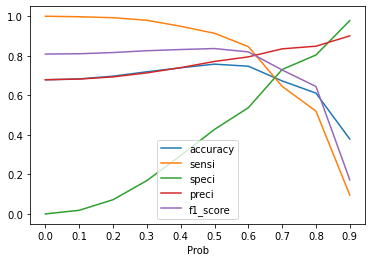

In [113]:
cutoff_df.plot.line(x='Prob', y=['accuracy','sensi','speci','preci','f1_score'], xticks = cutoff_df['Prob'])

In [103]:
submit_df = output_df[['Emp_ID', 'predicted']]
submit_df.head()

,Emp_ID,predicted
0,2,1
1,6,0
2,11,1
3,14,1
4,25,0


In [106]:
submit_df = submit_df.rename(columns={'predicted':'Target'})
submit_df.head()

,Emp_ID,Target
0,2,1
1,6,0
2,11,1
3,14,1
4,25,0


In [107]:
# Exporting File
submit_df.to_csv('./Output/output.csv', index=False)